In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from init_objects import *
from hft_model import *

# Enforcing the speed limit replication notebook

In [2]:
NRUNS = 1

In [3]:
parameters = {
    # global parameters
    "n_lft": 50,
    "n_hft": 5,
    "ticks": 1000,
    "fundamental_value": 10,
    "lft_sample_size": 0.2,
    "hft_sample_size": 0.6,
    "std_noise": 0.01,
    "std_LFT_price": 0.01,
    "std_LFT_vol": 4,
    "std_HFT_vol": 4,
    "return_on_investment": 0.5,
    "investment_frequency": 100,
    # lft parameters
    "w_fundamentalists": 1,
    "w_chartists": 10,
    "w_random": 1,
    # hft parameters
    "inventory_target": 20,
    "minimum_price_increment":0.1,
    "investment_fraction":0.4,
    # initial values
    "wealth": 300,
    "horizon_min": 1,
    "horizon_max": 4,
    "av_return_interval_max": 4,
    "init_price": 1,
    "agent_order_price_variability": (1,1),
    "total_hft_money": 200,
    "hft_speed": 1,
    "hft_init_investment": 0
}

# Initialisation

In [4]:
# 1 initalise model objects
high_frequency_traders, low_frequency_traders, orderbook = init_objects(parameters)

# Simulation

In [5]:
for seed in range(NRUNS): # optional, remove tqdm(), it is used for the progress bar
    high_frequency_traders, low_frequency_traders, orderbook = hft_model(high_frequency_traders, low_frequency_traders, orderbook, parameters, seed)

# Data analysis

In [6]:
average_tick_price = [np.mean(prices) for prices in orderbook.transaction_prices_history]
total_tick_volume = [sum(volumes) for volumes in orderbook.transaction_volumes_history]
returns = pd.Series(np.array(average_tick_price)).pct_change()
autocorr_returns = [pd.Series(returns).autocorr(lag=lag) for lag in range(25)]
absolute_returns = pd.Series(returns).abs()
autocorr_abs_returns = [absolute_returns.autocorr(lag=lag) for lag in range(25)]

## Prices, returns & volume

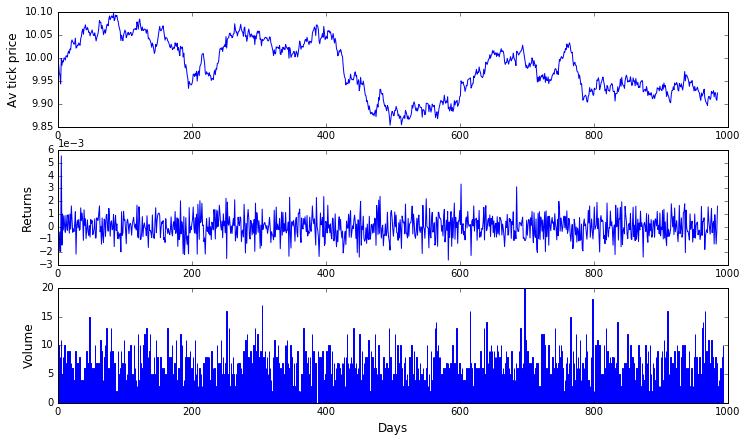

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,7))

ax1.plot(range(len(average_tick_price)), average_tick_price)
ax1.set_ylabel('Av tick price', fontsize='12')

ax2.plot(range(len(returns)), returns)
ax2.set_ylabel('Returns', fontsize='12')

ax3.bar(range(len(total_tick_volume)), total_tick_volume, edgecolor='b')
ax3.set_ylabel('Volume', fontsize='12')
ax3.set_xlabel('Days', fontsize='12')

for ax in [ax1, ax2, ax3]:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

## Bid-ask spread & volatility

In [8]:
bid_ask = [ask - bid for bid, ask in zip(orderbook.highest_bid_price_history, orderbook.lowest_ask_price_history)]
bid_ask = list(filter(lambda x: x >0, bid_ask))
np.mean(bid_ask)

0.006934024734921761

In [9]:
# is this the correct way 
window = 10
roller_returns = returns.rolling(window)
returns_volatility = roller_returns.std(ddof=0)
returns.std()

0.0009131555920537146

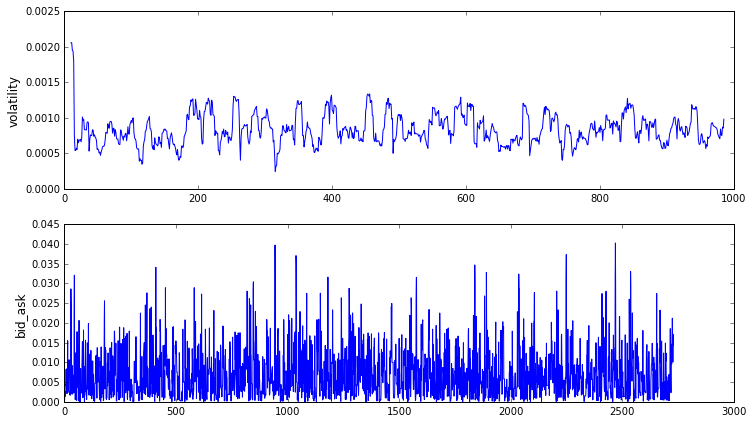

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,7))

ax1.plot(range(len(returns_volatility)), returns_volatility)
ax1.set_ylabel('volatility', fontsize='12')

ax2.plot(range(len(bid_ask)), bid_ask)
ax2.set_ylabel('bid_ask', fontsize='12')

# Basic financial market stylized facts
## No autocorrelation in returns

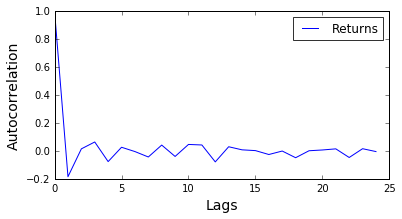

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,3))

ax1.plot(range(len(autocorr_returns)), autocorr_returns, label='Returns')

ax1.legend(frameon=True, loc='best', framealpha=0.8)
ax1.set_ylabel('Autocorrelation', fontsize='14')
ax1.set_xlabel('Lags', fontsize='14')
#fig.savefig('auto_correlation.png')

## Kurtosis

In [12]:
pd.Series(returns).kurtosis()

1.3006079538024578

## Clustered volatility

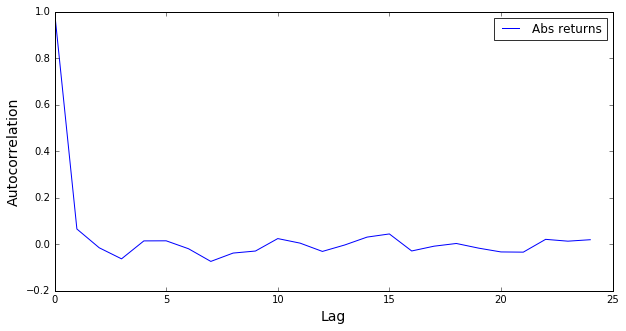

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(range(len(autocorr_abs_returns)), autocorr_abs_returns, label='Abs returns')

ax1.legend(frameon=True, loc='best', framealpha=0.8)
ax1.set_ylabel('Autocorrelation', fontsize='14')
ax1.set_xlabel('Lag', fontsize='14')
#fig.savefig('auto_correlation_abs.png')